In [3]:
!pip install torch==0.4.1 torchvision==0.2.1
!pip3 install --upgrade numpy==1.16.2
!pip install mxnet

Requirement already up-to-date: numpy==1.16.2 in /usr/local/lib/python3.6/dist-packages (1.16.2)
     |████████████████████████████████| 28.4MB 2.5MB/s 
     |████████████████████████████████| 13.8MB 32.2MB/s 
ERROR: spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: imgaug 0.2.9 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: fastai 1.0.52 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
ERROR: fastai 1.0.52 has requirement torch>=1.0.0, but you'll have torch 0.4.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Found existing install

In [1]:
from google.colab import drive
drive.mount('/content/drive')
main_dir = '/content/drive/My Drive/Colab Notebooks/Face_expression/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
sys.path.append("/content/drive/My Drive/Colab Notebooks/Face_expression/SC2")
from mtcnn.mtcnn import MTCNN
mtcnn = MTCNN()

/content/drive/My Drive/Colab Notebooks/Face_expression/expression_detector.py:106: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  inputs = Variable(inputs, volatile=True)
/content/drive/My Drive/Colab Notebooks/Face_expression/expression_detector.py:111: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  score = F.softmax(outputs_avg)


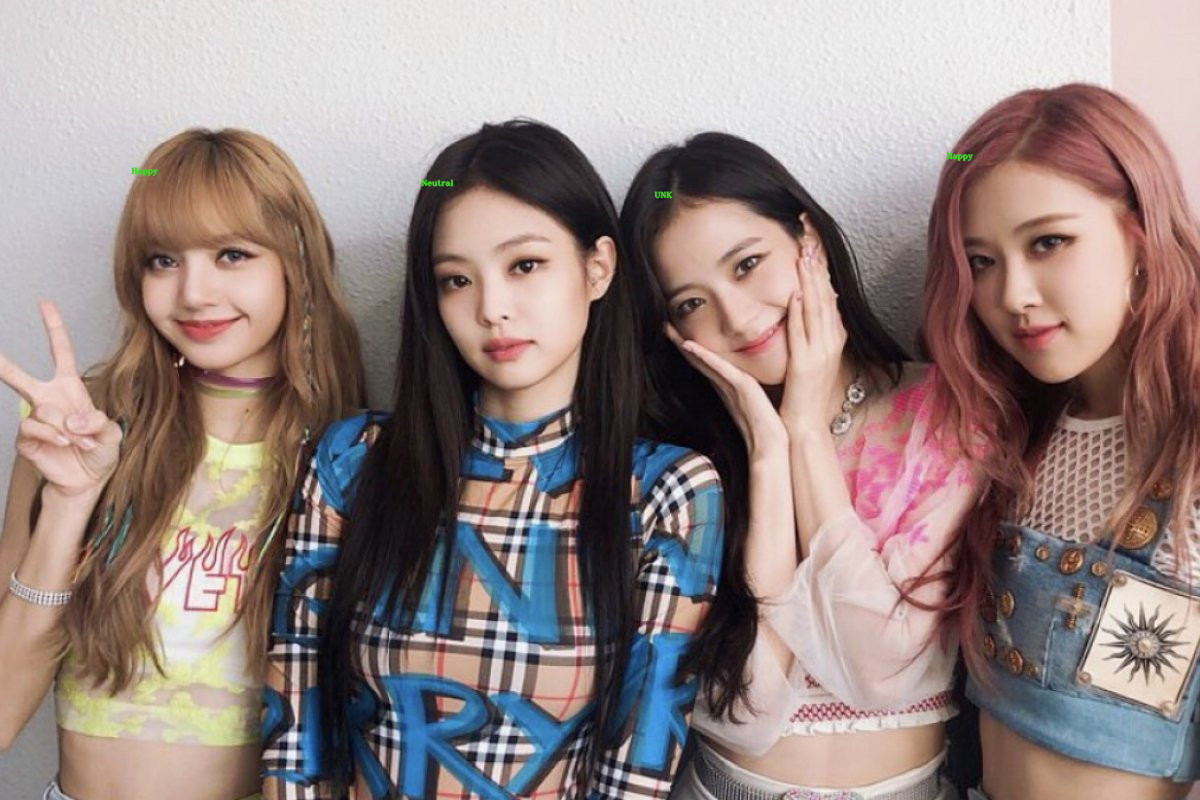

In [4]:
import cv2
from google.colab.patches import cv2_imshow
sys.path.append(main_dir)
from expression_detector import EmotionDetector
from expression_util import Visualizer
#multiple
data_dir = main_dir + 'samples/'
image_name = 'f2.jpg'
raw_img = cv2.imread(data_dir + image_name)
emotion_detector = EmotionDetector(model='VGG19', main_dir=main_dir, face_detector=mtcnn)

bounding_boxes, scores, predicteds = emotion_detector.detect_emotion_multiple_face(raw_img)
visualizer = Visualizer()
visualizer.draw_text_information(raw_img, bounding_boxes, scores, predicteds)

cv2_imshow(raw_img)